In [1]:
import numpy as np

In [2]:
x = np.array([1,2,3])

In [3]:
x

array([1, 2, 3])

In [6]:
y = np.array([2, 3.9, 6.1])

In [7]:
y

array([2. , 3.9, 6.1])

# データの中心化

In [9]:
x.mean()

2.0

In [10]:
y.mean()

4.0

In [11]:
xc = x - x.mean()

In [12]:
xc

array([-1.,  0.,  1.])

In [13]:
yc = y - y.mean()

In [14]:
yc

array([-2. , -0.1,  2.1])

## パラメータaの計算

In [31]:
xx = xc * xc

In [34]:
xx

array([1., 0., 1.])

In [20]:
xy = xc * yc

In [21]:
xy

array([ 2. , -0. ,  2.1])

In [24]:
xx.sum()

14

In [26]:
xy.sum()

4.1

In [32]:
a = xy.sum() / xx.sum()

In [35]:
a # 傾き

2.05

# Pandas : データベース操作

In [37]:
import pandas as pd

In [39]:
df = pd.read_csv('sample.csv')

In [40]:
print(df)

         x         y
0   40.362  137500.0
1   40.686  132500.0
2   38.430   93000.0
3   36.822   96500.0
4   37.002  100500.0
5   35.106   97500.0
6   35.016   97500.0
7   36.762  102000.0
8   38.844   99000.0
9   37.374   97000.0
10  37.170  108500.0
11  40.290  114000.0
12  35.478   94000.0
13  36.552   93500.0
14  37.524   92500.0
15  35.568   91500.0
16  37.056  106000.0
17  36.126   96000.0
18  35.232  102000.0
19  34.386   96500.0
20  35.220  110000.0
21  36.024  101500.0
22  35.766  102500.0
23  35.136   86500.0
24  35.274   94000.0
25  35.916  107000.0
26  33.678   78500.0
27  34.158   81000.0
28  38.586   90000.0
29  33.822   71500.0
..     ...       ...
70  35.250   87000.0
71  35.280   95500.0
72  33.432  115500.0
73  38.496  118000.0
74  35.154  113000.0
75  39.276  147000.0
76  36.120  116000.0
77  37.890  123000.0
78  41.160  149500.0
79  41.880  186000.0
80  46.590  199000.0
81  36.864  181000.0
82  42.930  189500.0
83  39.378  162500.0
84  33.624  132000.0
85  36.918  1

In [42]:
df.head(5)

,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0
3,36.822,96500.0
4,37.002,100500.0


In [46]:
# データの抽出
x = df['x']
y = df['y']

# Matplotlib : グラフの描画

In [47]:
import matplotlib.pyplot as plt

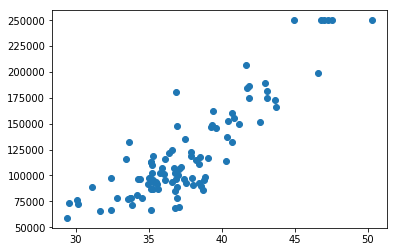

In [50]:
# 横軸をx, 縦軸をy, 散布図(scatter)をプロット
plt.scatter(x, y)
plt.show()

# 単回帰分析の実装
## データの中心化

In [51]:
df.describe()

,x,y
count,100.000000,100.000000
mean,37.622220,121065.000000
std,4.087547,47174.009226
min,29.418000,59000.000000
25%,35.151000,90375.000000
50%,36.909000,104250.000000
75%,39.439500,147250.000000
max,50.250000,250000.000000


In [52]:
x.mean()

37.62222

In [53]:
df.mean()

x        37.62222
y    121065.00000
dtype: float64

In [55]:
df_c = df - df.mean()

In [56]:
df_c.head(5)

,x,y
0,2.73978,16435.0
1,3.06378,11435.0
2,0.80778,-28065.0
3,-0.80022,-24565.0
4,-0.62022,-20565.0


In [58]:
df_c.describe()

,x,y
count,1.000000e+02,100.000000
mean,1.918465e-15,0.000000
std,4.087547e+00,47174.009226
min,-8.204220e+00,-62065.000000
25%,-2.471220e+00,-30690.000000
50%,-7.132200e-01,-16815.000000
75%,1.817280e+00,26185.000000
max,1.262778e+01,128935.000000


In [59]:
x = df_c['x']
y = df_c['y']

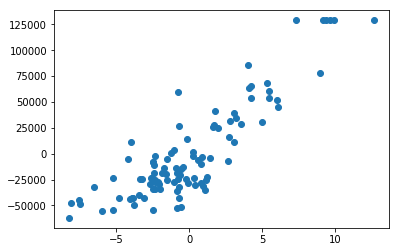

In [61]:
plt.scatter(x, y)
plt.show()

# パラメータaの計算

In [63]:
xx = x * x # * は要素積

In [65]:
xy = x * y

In [68]:
a = xy.sum() / xx.sum()

In [69]:
a

10069.022519284063

## プロットして確認

$$
\hat{y} = ax
$$

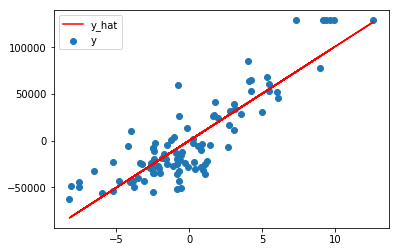

In [73]:
plt.scatter(x, y, label='y') # 実測値
plt.plot(x, a*x, label='y_hat', color='red') # 予測値
plt.legend()
plt.show()

## 予測値の計算

In [74]:
x_new = 40 # 40平米の部屋

In [75]:
mean = df.mean()

In [76]:
mean['x']

37.62222

In [77]:
# 中心化
xc = x_new - mean['x']

In [78]:
xc

2.3777800000000013

In [83]:
# 単回帰分析
yc = a * xc

In [84]:
yc

23941.920365903272

In [89]:
y_hat = a * xc  + mean['y']

In [90]:
y_hat

145006.92036590326

## 予測値を計算する関数作成

In [94]:
def predict(x):
    # 定数項
    a = 10069.022519284063
    xm = 37.62222
    ym = 121065.0
    # 中心化
    xc = x - xm
    # 予測値
    y_hat = a * xc + ym
    return y_hat

In [93]:
print(a)
print(mean['x'])
print(mean['y'])

10069.022519284063
37.62222
121065.0


In [96]:
# 予測値
predict(40)

145006.92036590326

In [98]:
# 外挿の範囲
print(predict(25))
print(predict(10))

-6028.417423357663
-157063.75521261862


In [99]:
predict(50)

245697.1455587439